## Creador de grupos para EDA
Se pueden cargar los alumnos desde un archivo '.csv' ingresando el path en la variable filename. Luego hay que configurar cuantos trabajos prácticos (iterations) se van a dar, y cómo se desean distribuir los grupos, esto último puede ser por ejemplo querer crear a partir de diez alumnos, 3 grupos que sean dos de tres alumnos y uno de cuatro alumnos.

### Ayudantes 2020
* Stewart Harris, Maria Luz
* Trozzo, Rafael Nicolás
* Kammann, Lucas Agustín

In [ ]:
# from random import shuffle

class Student:
    """ Clase alumno
    """
    def __init__(self, first_name, last_name, email):
        self.first_name = first_name
        self.last_name = last_name
        self.email = email
    
    def __str__(self):
        return self.last_name

    def __eq__(self, other):
        return self.last_name == other.last_name and self.first_name == other.first_name

def search_by_last_name(students: list, last_name: str) -> Student:
    """
    Devuelve el objeto Student dentro de la lista con ese apellido.
    :param students: Lista de estudiantes
    :param last_name: Apellido
    :return: Objecto Student
    """
    for student in students:
        if student.last_name == last_name:
            return student
    return None

# Se cargan del archivo 'filename' directo de un .csv todos los alumnos
# que se encuentran registrados para la cursada. Se cargan como objetos Student.
filename = 'alumnos_eda_20201Q.csv'
file = open(filename, 'r')
students = []
for index, line in enumerate(file):
    if index:
        first_name, last_name, email = line.split(',')
        students.append(Student(first_name, last_name, email))
shuffle(students)

# Carga de los parametros del algoritmo, se puede cargar una semana inicial, en caso de
# ser necesario, de otra forma se debe cargar con un contenido None.
# starting_week: None o Lista con grupos para la primera semana
# distribution: Distribucion de grupos, cuantos grupos y de que cantidades
# iterations: Cantidad de trabajos practicos
starting_week = [
    [
        search_by_last_name(students, 'BATINIC REY'),
        search_by_last_name(students, 'CORCOS'),
        search_by_last_name(students, 'DE LEON'),
        search_by_last_name(students, 'FRANCOIS')
    ],
    [
        search_by_last_name(students, 'IRIGOYEN'),
        search_by_last_name(students, 'MATTALONI VARONA'),
        search_by_last_name(students, 'MINNUCCI')
    ],
    [
        search_by_last_name(students, 'QUIHILLALT'),
        search_by_last_name(students, 'SCAPOLLA'),
        search_by_last_name(students, 'VEKSELMAN')
    ]
]
distribution = [3, 3, 4]
iterations = 9

# Presentacion de algunos datos
print(f'Se desean armar {len(distribution)} grupos distribuidos de a {", ".join([str(i) for i in distribution])} para {iterations} trabajos.')
for i, student in enumerate(students):
    print(f'Alumno - {i}: {student}')

In [107]:
from copy import copy

def take_n_elements(elements: list, n: int, combination: list = []) -> list:
    """
    A partir de una lista de elementos, se le pide que forme todas las combinaciones distintas sin orden tomando de a N
    elementos. Entonces, devuelve una lista de listas donde cada una de estas últimas provee una combinacion de elementos.
    :param elements: Lista de elementos distintos
    :param n: Cantidad de elementos por combinacion
    :return: Lista de combinaciones, combinacion es una lista de elementos.
    """
    if elements and len(combination) < n:
        combinations = []
        for i, element in enumerate(elements):
            new_combination = take_n_elements(elements[i + 1:], n, copy(combination + [element]))
            if new_combination:
                combinations += new_combination
        return combinations
    else:
        return [combination] if len(combination) == n else []

def take_groups(elements: list, distribution: list, current_week: list = []) -> list:
    """
    A partir de una lista de elementos, y una lista de distribucion que determina cuantos grupos y de que cantidad
    cada uno, se forman todos los casos posibles de tomar los elementos separandolos de a grupos.
    :param elements: Lista de elementos distintos
    :param distribution: Distribucion de grupos y alumnos
    :return: Todas las posibles combinaciones de los grupos[
    """
    if distribution:
        groups = take_n_elements(elements, distribution[0])
        weeks = []
        for group in groups:
            week = take_groups(
                [element for element in elements if element not in group], 
                distribution[1:], 
                copy(current_week + [group])
            )
            weeks += week
        return weeks
    else:
        return [current_week]

def are_equal(week_one: list, week_two: list) -> bool:
    """
    Verifico si dos semanas son iguales en sus grupos.
    :param week_one: Semana
    :param week_two: Otra semana
    :return: Son iguales, True. Son distintas, False.
    """
    count = 0
    for group_one in week_one:
        for group_two in week_two:
            if len(group_one) == len(group_two):
                for person_one in group_one:
                    if person_one not in group_two:
                        break
                else:
                    count += 1
    return count == len(week_one)

In [108]:
# Calculamos todas las combinaciones posible, no obstante hay repeticiones si hay cantidad de grupos repetidas
weeks = take_groups(students, distribution)

weeks_filtered = []
for week in weeks:
    for week_filtered in weeks_filtered:
        if are_equal(week_filtered, week):
            break
    else:
        weeks_filtered.append(week)
weeks = weeks_filtered
print(f'Se han creado {len(weeks)} combinaciones posibles para cada tanda de trabajo práctico.')

Se han creado 2100 combinaciones posibles para cada tanda de trabajo práctico.


In [114]:
def weight(weeks: list) -> dict:
    """
    Calcula la cantidad de vistas entre dos alumnos a lo largo de las semanas.
    :param combination: Lista de iteraciones de grupos de alumnos
    :param students: Lista de alumnos
    :return: Peso
    """
    weights = {}
    for week in weeks:
        for group in week:
            for i, first_person in enumerate(group):
                for second_person in group[i + 1:]:
                    if f'{first_person.last_name}|{second_person.last_name}' in weights.keys():
                        weights[f'{first_person.last_name}|{second_person.last_name}'] += 1
                    elif f'{second_person.last_name}|{first_person.last_name}' in weights.keys():
                        weights[f'{second_person.last_name}|{first_person.last_name}'] += 1
                    else:
                        weights[f'{first_person.last_name}|{second_person.last_name}'] = 1
    return weights

def total_weight(weeks: list) -> int:
    """
    Cantidad total de repeticiones entre personas.
    :param weeks: Semanas elegidas
    :return: Cantidad total.
    """
    weights = weight(weeks)
    total = 0
    for value in weights.values():
        total += value - 1
    return total

def cost(weeks: list) -> int:
    """
    Calcula el costo de una iteracion de combinaciones. O sea, se recibe una lista donde cada elemento
    es una combinacion de grupos, esto es, una lista de grupos que contienen a los alumnos.
    :param combination: Lista de iteraciones de grupos de alumnos
    :param students: Lista de alumnos
    :return: Peso
    """
    weights = weight(weeks)
    cost = 0
    for value in weights.values():
        if value > 1:
            cost += (2 ** (value - 1))
    return cost

In [110]:
from random import random
from pandas import DataFrame
from math import floor

# Primero, tengo que elegir un elemento al azar del cual partir.
if starting_week:
    for week in weeks:
        if are_equal(week, starting_week):
            start_week = week
            break
else:
    start_week = [weeks[floor(random() * len(weeks))]]
weeks.remove(start_week)
result = [start_week]

# Luego, tengo que buscar entre las combinaciones restantes aquella que de como resultado el menor de los costos
# y quedarme con ella para luego volver a iniciar el proceso
while len(result) < iterations:
    lowest_week = None
    lowest_cost = None
    for week in weeks:
        current_cost = cost(result + [week])
        if lowest_cost is None or lowest_cost > current_cost:
            lowest_cost = current_cost
            lowest_week = week
    else:
        result.append(lowest_week)
        weeks.remove(lowest_week)

# Comunico resultado final
print(weight(result))
print(f'\n\nResultado encontrado. Se ha encontrado una combinación de peso {total_weight(result)}.')

{'VEKSELMAN|QUIHILLALT': 3, 'VEKSELMAN|SCAPOLLA': 1, 'QUIHILLALT|SCAPOLLA': 2, 'MINNUCCI|IRIGOYEN': 3, 'MINNUCCI|MATTALONI VARONA': 1, 'IRIGOYEN|MATTALONI VARONA': 3, 'DE LEON|CORCOS': 3, 'DE LEON|FRANCOIS': 3, 'DE LEON|BATINIC REY': 2, 'CORCOS|FRANCOIS': 3, 'CORCOS|BATINIC REY': 3, 'FRANCOIS|BATINIC REY': 4, 'VEKSELMAN|DE LEON': 3, 'VEKSELMAN|MINNUCCI': 3, 'DE LEON|MINNUCCI': 1, 'QUIHILLALT|CORCOS': 1, 'QUIHILLALT|IRIGOYEN': 1, 'CORCOS|IRIGOYEN': 1, 'FRANCOIS|MATTALONI VARONA': 3, 'FRANCOIS|SCAPOLLA': 3, 'BATINIC REY|MATTALONI VARONA': 3, 'BATINIC REY|SCAPOLLA': 4, 'MATTALONI VARONA|SCAPOLLA': 3, 'VEKSELMAN|CORCOS': 2, 'VEKSELMAN|MATTALONI VARONA': 2, 'CORCOS|MATTALONI VARONA': 2, 'DE LEON|IRIGOYEN': 2, 'DE LEON|SCAPOLLA': 3, 'IRIGOYEN|SCAPOLLA': 3, 'QUIHILLALT|MINNUCCI': 2, 'QUIHILLALT|FRANCOIS': 2, 'QUIHILLALT|BATINIC REY': 3, 'MINNUCCI|FRANCOIS': 2, 'MINNUCCI|BATINIC REY': 3, 'QUIHILLALT|DE LEON': 3, 'QUIHILLALT|MATTALONI VARONA': 3, 'DE LEON|MATTALONI VARONA': 1, 'MINNUCCI|CORCOS'

In [111]:
""" Representación amigable de los resultados del creador de grupos
"""

def html_group(index: int, group: list) -> str:
    html = "<div style='height: 150px;'>"
    html += f'<h3>Grupo {index}</h3>'
    html += '<ul>'
    for person in group:
        html += f'<li>{person}</li>'
    html += '</ul>'
    html += "</div>"
    return html

def html_week(groups: list) -> str:
    html = "<div style='float: left; width: 100px;'>"
    for index, group in enumerate(groups):
        html += html_group(index + 1, group)
    html += "</div>"
    return html

def html_weeks(weeks: list) -> str:
    html = "<div style='overflow: hidden;'>"
    for week in weeks:
        html += html_week(week)
    html += "</div>"
    return html

In [115]:
from IPython.core.display import display, HTML


display(HTML('<h1>Algoritmo buscando el siguiente menos costoso</h1>'))
display(HTML(html_weeks(result)))

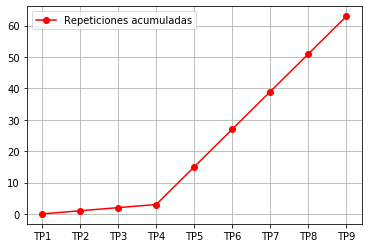

In [125]:
%matplotlib inline
from matplotlib import pyplot

# Calculo cada una de las repeticiones acumuladas
repeats = []
for i in range(iterations):
    repeats.append(total_weight(result[:i + 1]))
    
# Lo grafico en el tiempo de las semanas
pyplot.plot([f'TP{i + 1}' for i in range(iterations)], repeats, color='red', marker='o', label='Repeticiones acumuladas')
pyplot.legend()
pyplot.grid()
pyplot.show()